## Good Reads - Data Preprocessing and Exploratory Analysis






### Importing all the required libraries



In [ ]:
import pandas as pd
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Connecting Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Converting Dataset into a dataframe

In [ ]:
df=pd.read_csv('/content/drive/My Drive/BI and Data Mining/Final Project/books_updated.csv')

#### Preview of the dataset

In [ ]:
df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name,toread_count,currently_reading
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,"favorites, currentlyreading, youngadult, ficti...",0.0,35418.0
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,"toread, favorites, fantasy, currentlyreading, ...",287.0,44640.0
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,"youngadult, fantasy, favorites, vampires, ya, ...",0.0,240.0
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,"classics, favorites, toread, classic, historic...",50.0,1997.0
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,"classics, favorites, fiction, classic, booksio...",48.0,313.0


#### Setting id column as index

In [ ]:
df.index=df['id']
df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,tag_name,toread_count,currently_reading
id,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,"favorites, currentlyreading, youngadult, ficti...",0.0,35418.0
2,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,"toread, favorites, fantasy, currentlyreading, ...",287.0,44640.0
3,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,"youngadult, fantasy, favorites, vampires, ya, ...",0.0,240.0
4,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,"classics, favorites, toread, classic, historic...",50.0,1997.0
5,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,"classics, favorites, fiction, classic, booksio...",48.0,313.0


#### Stats about the dataframe

In [ ]:
df.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,toread_count,currently_reading
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,9776.000000
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04,8.749300,767.998977
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04,66.773326,2299.037217
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02,0.000000,1.000000
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03,0.000000,119.000000
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03,0.000000,271.000000
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04,0.000000,622.000000
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06,1812.000000,77785.000000


#### Info about the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int

#### Plotting the correlation between various columns using Heatmap
Not all columns contribute to the rating of the books

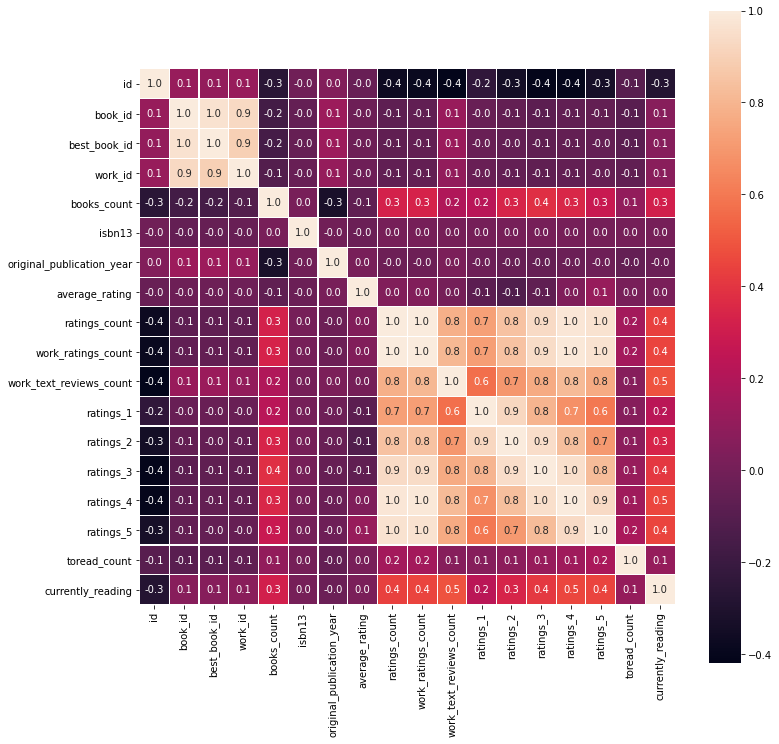

In [ ]:
f,ax = plt.subplots(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True, linewidths = 0.1, fmt = '.1f', ax = ax, square = True)

### Data Cleansing
#### Gathering facts about datatype, mssing values, unique values

In [ ]:
facts = pd.DataFrame(df.dtypes)
facts = facts.rename(columns={0:'Data_Type'})
facts['Missing Values'] = df.isnull().sum()
facts['Unique'] = df.nunique()
facts['Count'] = df.count()

facts

,Data_Type,Missing Values,Unique,Count
id,int64,0,10000,10000
book_id,int64,0,10000,10000
best_book_id,int64,0,10000,10000
work_id,int64,0,10000,10000
books_count,int64,0,597,10000
isbn,object,700,9300,9300
isbn13,float64,585,9153,9415
authors,object,0,4664,10000
original_publication_year,float64,21,293,9979
original_title,object,585,9274,9415


#### Inspecting the data in language_code:

In [ ]:
df['language_code'].unique()

array(['eng', 'en-US', 'en-CA', nan, 'spa', 'en-GB', 'fre', 'nl', 'ara',
       'por', 'ger', 'nor', 'jpn', 'en', 'vie', 'ind', 'pol', 'tur',
       'dan', 'fil', 'ita', 'per', 'swe', 'rum', 'mul', 'rus'],
      dtype=object)

#### Standardizing the nomenclature for code 'eng-US', 'eng-CA', 'eng-GB' as 'eng' for of analysis and computations 

In [ ]:
df['language_code'].replace({'en-US':'eng','en-CA':'eng','en-GB':'eng'},inplace=True)
df['language_code'].value_counts()

eng    8726
ara      64
fre      25
ind      21
spa      20
ger      13
jpn       7
per       7
pol       6
por       6
en        4
nor       3
dan       3
fil       2
ita       2
rum       1
nl        1
mul       1
swe       1
rus       1
tur       1
vie       1
Name: language_code, dtype: int64

#### Imputing missing values using mode value which is 'eng'

In [ ]:
mode = df['language_code'].value_counts().idxmax()
mode

'eng'

In [ ]:
df['language_code'] = df['language_code'].fillna('eng')

### Imputing missing values using K-neighbor = 5 
#### applying KNN=5 on columns 'currently_reading' and 'original_publication_year' 

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)
df[['currently_reading','original_publication_year']] = imputer.fit_transform(df[['currently_reading','original_publication_year']])


#### Fetching dataframe info:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  10000 non-null  float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              10000 non-null  object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int

### Dropping the unwanted columns:
We drop the following columns as imputing the missing values for ISBN and original-title is not logical. Also, these columns will not aid in analysis.

In [ ]:
df_cleaned = df.drop(['best_book_id', 'work_id', 'isbn', 'isbn13', 'original_title', 'image_url', 'small_image_url'], axis=1)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   books_count                10000 non-null  int64  
 3   authors                    10000 non-null  object 
 4   original_publication_year  10000 non-null  float64
 5   title                      10000 non-null  object 
 6   language_code              10000 non-null  object 
 7   average_rating             10000 non-null  float64
 8   ratings_count              10000 non-null  int64  
 9   work_ratings_count         10000 non-null  int64  
 10  work_text_reviews_count    10000 non-null  int64  
 11  ratings_1                  10000 non-null  int64  
 12  ratings_2                  10000 non-null  int64  
 13  ratings_3                  10000 non-null  int

### Adding rating_range & rating_cat (as good, excellent etc)
rating_range is added based on the average rating, rating_cat is derived from rating_range to be used in some analysis.
0-1 : Poor
1-2 : Below Average
2-3 : Average
3-4 : Good
4-5 : Excellent

In [ ]:
df_cleaned.loc[ (df_cleaned['average_rating'] >= 0) & (df_cleaned['average_rating'] <= 1), 'rating_range'] = "between_0_to_1"
df_cleaned.loc[ (df_cleaned['average_rating'] > 1) & (df_cleaned['average_rating'] <= 2), 'rating_range'] = "between_1_to_2"
df_cleaned.loc[ (df_cleaned['average_rating'] > 2) & (df_cleaned['average_rating'] <= 3), 'rating_range'] = "between_2_to_3"
df_cleaned.loc[ (df_cleaned['average_rating'] > 3) & (df_cleaned['average_rating'] <= 4), 'rating_range'] = "between_3_to_4"
df_cleaned.loc[ (df_cleaned['average_rating'] > 4) & (df_cleaned['average_rating'] <= 5), 'rating_range'] = "between_4_to_5"

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   books_count                10000 non-null  int64  
 3   authors                    10000 non-null  object 
 4   original_publication_year  10000 non-null  float64
 5   title                      10000 non-null  object 
 6   language_code              10000 non-null  object 
 7   average_rating             10000 non-null  float64
 8   ratings_count              10000 non-null  int64  
 9   work_ratings_count         10000 non-null  int64  
 10  work_text_reviews_count    10000 non-null  int64  
 11  ratings_1                  10000 non-null  int64  
 12  ratings_2                  10000 non-null  int64  
 13  ratings_3                  10000 non-null  int

In [ ]:
df_cleaned.loc[ (df_cleaned['rating_range'] == 'between_0_to_1'), 'rating_cat'] = 'Poor'
df_cleaned.loc[ (df_cleaned['rating_range'] == 'between_1_to_2'), 'rating_cat'] = 'Below Average'
df_cleaned.loc[ (df_cleaned['rating_range'] == 'between_2_to_3'), 'rating_cat'] = 'Average'
df_cleaned.loc[ (df_cleaned['rating_range'] == 'between_3_to_4'), 'rating_cat'] = 'Good'
df_cleaned.loc[ (df_cleaned['rating_range'] == 'between_4_to_5'), 'rating_cat'] = 'Excellent'

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   books_count                10000 non-null  int64  
 3   authors                    10000 non-null  object 
 4   original_publication_year  10000 non-null  float64
 5   title                      10000 non-null  object 
 6   language_code              10000 non-null  object 
 7   average_rating             10000 non-null  float64
 8   ratings_count              10000 non-null  int64  
 9   work_ratings_count         10000 non-null  int64  
 10  work_text_reviews_count    10000 non-null  int64  
 11  ratings_1                  10000 non-null  int64  
 12  ratings_2                  10000 non-null  int64  
 13  ratings_3                  10000 non-null  int

### Normalizing the text fields:
Convert text to lowercase, remove text in square brackets, remove links, remove punctuation and remove words containing numbers.

In [ ]:
import re
import string
def text_cleaning(text):
    text = str(text).lower()
    text = re.sub('ï¼¦ï½ï½–ï½ï½’ï½‰ï½”ï½…ï½“', '', text)
    text = re.sub('Ù‡ÙŠØ¨ØªØ§ Ù…Ø­Ù…Ø¯ØµØ§Ø¯Ù‚', '', text)
    text = re.sub('Ø¯Ø£Ø­Ù…Ø¯Ø®Ø§Ù„Ø¯ØªÙˆÙÙŠÙ', '', text)
    text = re.sub('Ø±ÙˆØ§ÙŠØ§Øª', '', text)
    text = re.sub('ÙÙ„Ø³ÙÙ‡', '', text)
    text = re.sub('Ã³', 'o', text)
    text = re.sub('â€™', 'ae', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub('©', 'copyright', text) 
    return text


In [ ]:
df_cleaned['title_clean'] = df_cleaned['title'].apply(lambda x:text_cleaning(x))

In [ ]:
df_cleaned['authors_clean'] = df_cleaned['authors'].apply(lambda x:text_cleaning(x))

In [ ]:
df_cleaned['tag_name_clean'] = df_cleaned['tag_name'].apply(lambda x:text_cleaning(x))

In [ ]:
df_cleaned['tag_name_clean']

id
1        favorites currentlyreading youngadult fiction ...
2        toread favorites fantasy currentlyreading youn...
3        youngadult fantasy favorites vampires ya ficti...
4        classics favorites toread classic historicalfi...
5        classics favorites fiction classic booksiown o...
                               ...                        
9996     toread urbanfantasy fantasy romance paranormal...
9997     toread biography history nonfiction politics c...
9998     toread historicalfiction fiction historical cu...
9999     toread nonfiction parenting feminism sociology...
10000    toread history nonfiction currentlyreading mil...
Name: tag_name_clean, Length: 10000, dtype: object

### Bringing consistency in author names:
In many instance, the names of a particular author appear in different initials and forms. Normalizing it to aid analysis.

In [ ]:
df_cleaned.loc[(df_cleaned['authors_clean'].str[:8] == 'dr seuss'), 'authors_clean'] = 'dr seuss'
df_cleaned.loc[(df_cleaned['authors_clean'].str[:5] == 'homer'), 'authors_clean'] = 'homer' 
df_cleaned.loc[(df_cleaned['authors_clean'].str[:10] == 'jk rowling'), 'authors_clean'] = 'jk rowling'

In [ ]:
df_cleaned.loc[(df_cleaned['authors_clean'].str[:13] == 'george orwell'), 'authors_clean'] = 'george orwell'
df_cleaned.loc[(df_cleaned['authors_clean'].str[:19] == 'william shakespeare'), 'authors_clean'] = 'william shakespeare'
df_cleaned.loc[(df_cleaned['authors_clean'].str[:10] == 'anne frank'), 'authors_clean'] = 'anne frank'
df_cleaned.loc[(df_cleaned['authors_clean'].str[:16] == 'charlotte bronte'), 'authors_clean'] = 'charlotte bronte'
df_cleaned.loc[(df_cleaned['authors_clean'].str[:12] == 'emily bronte'), 'authors_clean'] = 'emily bronte'
df_cleaned.loc[(df_cleaned['authors_clean'].str[:11] == 'gabriel gar'), 'authors_clean'] = 'gabriel garcia marquez'
df_cleaned.loc[(df_cleaned['authors_clean'].str[:7] == 'junot d'), 'authors_clean'] = 'junot diaz'

In [ ]:
df_cleaned.authors_clean.unique()

array(['suzanne collins', 'jk rowling', 'stephenie meyer', ...,
       'ian mortimer', 'peggy orenstein', 'john keegan'], dtype=object)

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   books_count                10000 non-null  int64  
 3   authors                    10000 non-null  object 
 4   original_publication_year  10000 non-null  float64
 5   title                      10000 non-null  object 
 6   language_code              10000 non-null  object 
 7   average_rating             10000 non-null  float64
 8   ratings_count              10000 non-null  int64  
 9   work_ratings_count         10000 non-null  int64  
 10  work_text_reviews_count    10000 non-null  int64  
 11  ratings_1                  10000 non-null  int64  
 12  ratings_2                  10000 non-null  int64  
 13  ratings_3                  10000 non-null  int

### Extracting data for Weka inputs:
For the classification methods, we are taking a subset of the columns of and exporting it to CSV file. This CSV file is used as an input for WEKA.
The columns 'id', 'books_count', 'average_rating', 'authors', 'original_publication_year', 'title', 'tag_name', 
 'toread_count', 'currently_reading', 'rating_range', 'title_clean', 'authors_clean' are not a part of this subset. Also, an excel export is taken to be used for Tableau visualizations used for data inspection.

In [ ]:
df_classification = df_cleaned.drop(['id', 'books_count', 'average_rating', 'authors', 'original_publication_year', 'title', 'tag_name', 
 'toread_count', 'currently_reading', 'rating_range', 'title_clean', 'authors_clean'], axis=1)
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   book_id                  10000 non-null  int64 
 1   language_code            10000 non-null  object
 2   ratings_count            10000 non-null  int64 
 3   work_ratings_count       10000 non-null  int64 
 4   work_text_reviews_count  10000 non-null  int64 
 5   ratings_1                10000 non-null  int64 
 6   ratings_2                10000 non-null  int64 
 7   ratings_3                10000 non-null  int64 
 8   ratings_4                10000 non-null  int64 
 9   ratings_5                10000 non-null  int64 
 10  rating_cat               10000 non-null  object
 11  tag_name_clean           10000 non-null  object
dtypes: int64(9), object(3)
memory usage: 1015.6+ KB


#### Export dataframe to excel and CSV

In [ ]:
df_cleaned.to_excel("books_cleaned.xlsx") 

In [ ]:
df_classification.to_csv('books_classification.csv') 

### Dataframe for Text mining

In [ ]:
df_t_mining = df_cleaned[['title_clean', 'tag_name_clean', 'rating_cat', 'language_code']]
df_t_mining.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title_clean     10000 non-null  object
 1   tag_name_clean  10000 non-null  object
 2   rating_cat      10000 non-null  object
 3   language_code   10000 non-null  object
dtypes: object(4)
memory usage: 390.6+ KB


In [ ]:
df_t_mining.to_csv('books_text_mining.csv')

#### Creating column Book_cat:
This column is derived by identifying the peculiar words strings that are most common in the tag_names in order to find the genre of the books.
If the tag name has values like "historical" and "classic", the category is historical classic. If the tag name has strings 'suspense' or 'thriller', then the category is thriller

In [ ]:
df_t_mining['book_cat'] = df_t_mining['tag_name_clean']

In [ ]:
df_t_mining.loc[df_t_mining['book_cat'].str.contains('classic' and 'historical'), 'book_cat'] = 'historical classic'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('fiction' and 'children'), 'book_cat'] = 'fiction for children'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('fiction' and 'romance'), 'book_cat'] = 'romantic fiction'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('fiction' and 'scifi'), 'book_cat'] = 'scifi fiction'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('nonfiction'), 'book_cat'] = 'nonfiction'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('christianfiction'), 'book_cat'] = 'christian fiction'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('africa' and 'fiction'), 'book_cat'] = 'african fiction'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('suspense' or 'thriller'), 'book_cat'] = 'thriller'

In [ ]:
df_t_mining['book_cat']

id
1           african fiction
2           african fiction
3           african fiction
4        historical classic
5        historical classic
                ...        
9996        african fiction
9997        african fiction
9998     historical classic
9999        african fiction
10000       african fiction
Name: book_cat, Length: 10000, dtype: object

Assigning appropriate book categories based on the peculiar words in tag_names.

In [ ]:
df_t_mining.loc[df_t_mining['book_cat'].str.contains('russian'), 'book_cat'] = 'russian classic'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('travel'), 'book_cat'] = 'travel'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('suspense' or 'thriller' or 'mystery' or 'mysteries'), 'book_cat'] = 'mystery'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('comics'), 'book_cat'] = 'comics'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('philosophy'), 'book_cat'] = 'philosophy'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('fantasy'), 'book_cat'] = 'fantasy'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('poetry'), 'book_cat'] = 'poetry'

df_t_mining.loc[df_t_mining['book_cat'].str.contains('arabic' or 'arabicbooks' or 'arabicnovels'), 'book_cat'] = 'mystery'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('shakespeare'), 'book_cat'] = 'shakespearean classic'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('americanliterature'), 'book_cat'] = 'american literature'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('religious'), 'book_cat'] = 'religious'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('italia'), 'book_cat'] = 'italian'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('horror'), 'book_cat'] = 'horror'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('classics' and 'drama'), 'book_cat'] = 'classic plays'

In [ ]:
df_t_mining.loc[df_t_mining['book_cat'].str.contains('jamespatterson'), 'book_cat'] = 'thriller'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('spanish'), 'book_cat'] = 'fiction'
df_t_mining.loc[df_t_mining['book_cat'].str.contains('classics' and 'crime'), 'book_cat'] = 'classic crime'

In [ ]:
words = df_t_mining['book_cat'].unique()
words

array(['african fiction', 'historical classic', 'fiction', 'fantasy',
       'russian classic', 'travel', 'classic crime', 'philosophy',
       'comics', 'mystery', 'thriller', 'horror', 'religious', 'poetry',
       'classic plays', 'american literature', 'shakespearean classic',
       'italian'], dtype=object)

Further narrowing down the book categories:

In [ ]:
df_t_mining['book_cat'].replace({'african fiction': 'fiction', 'spanish': 'fiction', 
        'italian': 'fiction', 'russian classic': 'fiction', 'fantasy': 'fiction'}, inplace = True) 

In [ ]:
df_t_mining['book_cat'].replace({'classic plays': 'classic', 'shakespearean classic': 'classic', 
                    'classic crime': 'classic', 'historical classic': 'classic'}, inplace = True) 

In [ ]:
df_t_mining['book_cat'].replace({'mystery': 'fiction', 'thriller': 'fiction', 'horror': 'fiction'
    }, inplace = True) 

In [ ]:
df_t_mining['book_cat'].replace({'travel': 'philosophy and religion', 'philosophy': 'philosophy and religion', 
                                 'religious': 'philosophy and religion'}, inplace = True) 

In [ ]:
df_t_mining['book_cat'].unique()

array(['fiction', 'classic', 'philosophy and religion', 'comics',
       'poetry', 'american literature'], dtype=object)

Here, the columns for books with Arabic language have many indecipherable symbols or notations. They cannot be provided as an input to WEKA. Hence, dropping the records for Arabic language. 

In [ ]:
df_t_mining.drop(df_t_mining[df_t_mining['language_code'] == 'ara'].index, inplace = True) 

In [ ]:
df_t_mining = df_t_mining.drop(['language_code'], axis = 1) 

In [ ]:
df_t_mining = df_t_mining.drop(['title_clean'], axis = 1) 

In [ ]:
df_t_mining.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9936 entries, 1 to 10000
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tag_name_clean  9936 non-null   object
 1   rating_cat      9936 non-null   object
 2   book_cat        9936 non-null   object
dtypes: object(3)
memory usage: 630.5+ KB


#### Exporting data to CSV file

In [ ]:
df_t_mining.to_csv('books_text_mining.csv')